In [119]:
import pandas as pd

In [120]:
train = pd.read_csv(r'C:\Users\mahe\Downloads\Train_SU63ISt.csv')
test = pd.read_csv(r'C:\Users\mahe\Downloads\Test_0qrQsBZ.csv')
train['source'] = 'train'
test['source'] = 'test'

In [121]:
import numpy as np

In [122]:
train.head()

,ID,Datetime,Count,source
0,0,25-08-2012 00:00,8,train
1,1,25-08-2012 01:00,2,train
2,2,25-08-2012 02:00,6,train
3,3,25-08-2012 03:00,2,train
4,4,25-08-2012 04:00,2,train


In [123]:
train.apply(lambda x: sum(x.isnull()))

ID          0
Datetime    0
Count       0
source      0
dtype: int64

In [124]:
data = pd.concat([train, test],ignore_index=True)

In [125]:
data.apply(lambda x: sum(x.isnull()))

ID             0
Datetime       0
Count       5112
source         0
dtype: int64

In [126]:
data.dtypes

ID            int64
Datetime     object
Count       float64
source       object
dtype: object

In [127]:
data['Datetime']=pd.to_datetime(data['Datetime'])

In [128]:
data.dtypes

ID                   int64
Datetime    datetime64[ns]
Count              float64
source              object
dtype: object

In [129]:
hour = data['Datetime'].dt.hour

In [130]:
hour

0         0
1         1
2         2
3         3
4         4
         ..
23395    19
23396    20
23397    21
23398    22
23399    23
Name: Datetime, Length: 23400, dtype: int64

In [131]:
data['hour']=hour

In [132]:
data['year'] = data['Datetime'].dt.year

In [133]:
data.head()

,ID,Datetime,Count,source,hour,year
0,0,2012-08-25 00:00:00,8.0,train,0,2012
1,1,2012-08-25 01:00:00,2.0,train,1,2012
2,2,2012-08-25 02:00:00,6.0,train,2,2012
3,3,2012-08-25 03:00:00,2.0,train,3,2012
4,4,2012-08-25 04:00:00,2.0,train,4,2012


In [134]:
data['day'] = data['Datetime'].dt.day

In [135]:
data.head()

,ID,Datetime,Count,source,hour,year,day
0,0,2012-08-25 00:00:00,8.0,train,0,2012,25
1,1,2012-08-25 01:00:00,2.0,train,1,2012,25
2,2,2012-08-25 02:00:00,6.0,train,2,2012,25
3,3,2012-08-25 03:00:00,2.0,train,3,2012,25
4,4,2012-08-25 04:00:00,2.0,train,4,2012,25


In [136]:
data['day'] = data['Datetime'].dt.dayofweek

In [137]:
data.head()

,ID,Datetime,Count,source,hour,year,day
0,0,2012-08-25 00:00:00,8.0,train,0,2012,5
1,1,2012-08-25 01:00:00,2.0,train,1,2012,5
2,2,2012-08-25 02:00:00,6.0,train,2,2012,5
3,3,2012-08-25 03:00:00,2.0,train,3,2012,5
4,4,2012-08-25 04:00:00,2.0,train,4,2012,5


In [138]:
data['month'] = data['Datetime'].dt.month

In [139]:
data.head()

,ID,Datetime,Count,source,hour,year,day,month
0,0,2012-08-25 00:00:00,8.0,train,0,2012,5,8
1,1,2012-08-25 01:00:00,2.0,train,1,2012,5,8
2,2,2012-08-25 02:00:00,6.0,train,2,2012,5,8
3,3,2012-08-25 03:00:00,2.0,train,3,2012,5,8
4,4,2012-08-25 04:00:00,2.0,train,4,2012,5,8


In [140]:
data = data.drop(['Datetime'],axis=1)

In [141]:
data.head()

,ID,Count,source,hour,year,day,month
0,0,8.0,train,0,2012,5,8
1,1,2.0,train,1,2012,5,8
2,2,6.0,train,2,2012,5,8
3,3,2.0,train,3,2012,5,8
4,4,2.0,train,4,2012,5,8


In [142]:
data = data.drop(['year'],axis=1)

In [143]:
data.head()

,ID,Count,source,hour,day,month
0,0,8.0,train,0,5,8
1,1,2.0,train,1,5,8
2,2,6.0,train,2,5,8
3,3,2.0,train,3,5,8
4,4,2.0,train,4,5,8


In [144]:
data.dtypes

ID          int64
Count     float64
source     object
hour        int64
day         int64
month       int64
dtype: object

In [145]:
condition1= (data['day']==5) | (data['day']==6)
condition2 = (data['day']==0) | (data['day']==1) | (data['day']==2) | (data['day']==3) | (data['day']==4)
conditions = [condition1, condition2]
choices1 = ["False", "True"]
choices2 = ["True","False"]
data['weekday'] = np.select(conditions, choices1, default="")
data['weekend'] = np.select(conditions, choices2, default="")

In [146]:
data.head()

,ID,Count,source,hour,day,month,weekday,weekend
0,0,8.0,train,0,5,8,False,True
1,1,2.0,train,1,5,8,False,True
2,2,6.0,train,2,5,8,False,True
3,3,2.0,train,3,5,8,False,True
4,4,2.0,train,4,5,8,False,True


In [147]:
data.head(100)

,ID,Count,source,hour,day,month,weekday,weekend
0,0,8.0,train,0,5,8,False,True
1,1,2.0,train,1,5,8,False,True
2,2,6.0,train,2,5,8,False,True
3,3,2.0,train,3,5,8,False,True
4,4,2.0,train,4,5,8,False,True
...,...,...,...,...,...,...,...,...
95,95,2.0,train,23,1,8,True,False
96,96,4.0,train,0,2,8,True,False
97,97,6.0,train,1,2,8,True,False
98,98,2.0,train,2,2,8,True,False


In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['weekday'] = le.fit_transform(data['weekday'])
data['weekend'] = le.fit_transform(data['weekend'])

In [149]:
data

,ID,Count,source,hour,day,month,weekday,weekend
0,0,8.0,train,0,5,8,0,1
1,1,2.0,train,1,5,8,0,1
2,2,6.0,train,2,5,8,0,1
3,3,2.0,train,3,5,8,0,1
4,4,2.0,train,4,5,8,0,1
...,...,...,...,...,...,...,...,...
23395,23395,NaN,test,19,6,4,0,1
23396,23396,NaN,test,20,6,4,0,1
23397,23397,NaN,test,21,6,4,0,1
23398,23398,NaN,test,22,6,4,0,1


In [150]:
condition1= (data['hour']>=0) & (data['hour']<=6)
condition2 = (data['hour']>=7) & (data['hour']<=12)
condition3 = (data['hour']>=13) & (data['hour']<=19)
condition4 = (data['hour']>=20) & (data['hour']<=23)
conditions = [condition1, condition2,condition3,condition4]
choice = ['Sleeptime','Morning','Afternoon','Night']
data['TimeofDay'] = np.select(conditions, choice, default="")

In [151]:
data = pd.get_dummies(data, columns=['TimeofDay'])

In [152]:
data.head(10)

,ID,Count,source,hour,day,month,weekday,weekend,TimeofDay_Afternoon,TimeofDay_Morning,TimeofDay_Night,TimeofDay_Sleeptime
0,0,8.0,train,0,5,8,0,1,0,0,0,1
1,1,2.0,train,1,5,8,0,1,0,0,0,1
2,2,6.0,train,2,5,8,0,1,0,0,0,1
3,3,2.0,train,3,5,8,0,1,0,0,0,1
4,4,2.0,train,4,5,8,0,1,0,0,0,1
5,5,2.0,train,5,5,8,0,1,0,0,0,1
6,6,2.0,train,6,5,8,0,1,0,0,0,1
7,7,2.0,train,7,5,8,0,1,0,1,0,0
8,8,6.0,train,8,5,8,0,1,0,1,0,0
9,9,2.0,train,9,5,8,0,1,0,1,0,0


In [153]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [154]:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\users\mahe\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [155]:
train

,ID,Count,hour,day,month,weekday,weekend,TimeofDay_Afternoon,TimeofDay_Morning,TimeofDay_Night,TimeofDay_Sleeptime
0,0,8.0,0,5,8,0,1,0,0,0,1
1,1,2.0,1,5,8,0,1,0,0,0,1
2,2,6.0,2,5,8,0,1,0,0,0,1
3,3,2.0,3,5,8,0,1,0,0,0,1
4,4,2.0,4,5,8,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
18283,18283,868.0,19,3,9,1,0,1,0,0,0
18284,18284,732.0,20,3,9,1,0,0,0,1,0
18285,18285,702.0,21,3,9,1,0,0,0,1,0
18286,18286,580.0,22,3,9,1,0,0,0,1,0


In [156]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [166]:
target = 'Count'
IDcol = ['ID']
from sklearn import model_selection, metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    print(alg.score(dtrain[predictors], dtrain[target]))
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    print(alg.score(dtest[predictors],dtest[target]))
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [167]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]

In [164]:
predictors

['hour',
 'day',
 'month',
 'weekday',
 'weekend',
 'TimeofDay_Afternoon',
 'TimeofDay_Morning',
 'TimeofDay_Night',
 'TimeofDay_Sleeptime']

0.05774022286978898

Model Report
RMSE : 149
1.0


<ipython-input-166-65aa3e37c3e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


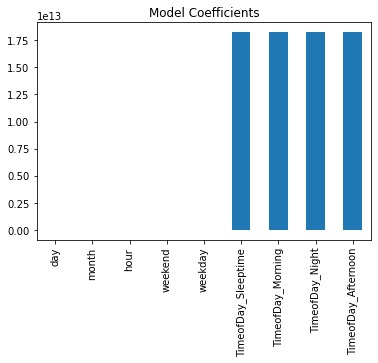

In [171]:
linear_model = LinearRegression()
modelfit(linear_model, train, test, predictors, target, IDcol, 'LinearRegression.csv')
coef1 = pd.Series(linear_model.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [108]:
predictors = X_train.columns

In [109]:
predictors

Index(['ID', 'hour', 'day', 'month', 'weekday', 'weekend',
       'TimeofDay_Afternoon', 'TimeofDay_Morning', 'TimeofDay_Night',
       'TimeofDay_Sleeptime'],
      dtype='object')

In [111]:
coef = pd.Series(linear_model.coef_,predictors).sort_values()

In [112]:
print(coef)

TimeofDay_Sleeptime   -34.067034
weekend               -14.234409
day                    -2.237141
TimeofDay_Morning      -2.102703
ID                      0.022944
hour                    1.539818
month                   2.684236
TimeofDay_Night        11.920969
weekday                14.234409
TimeofDay_Afternoon    24.248768
dtype: float64


0.057727979701652325

Model Report
RMSE : 149
1.0


<ipython-input-166-65aa3e37c3e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


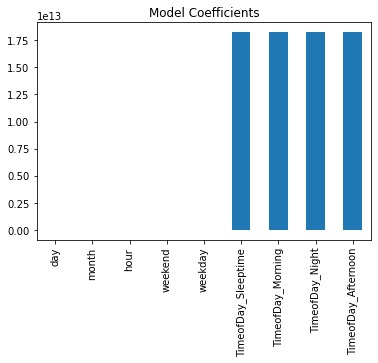

In [173]:
lasso = Lasso(alpha=0.05)
modelfit(lasso, train, test, predictors, target, IDcol, 'Lasso.csv')
coef2 = pd.Series(linear_model.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

0.057749422692211616

Model Report
RMSE : 149
1.0


<ipython-input-166-65aa3e37c3e8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


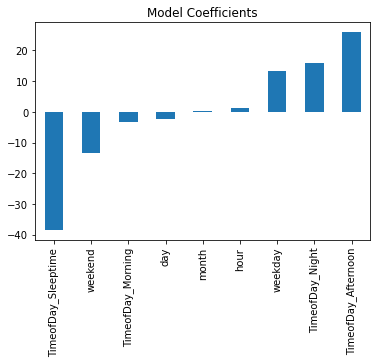

In [175]:
alg3 = Ridge(alpha=0.05)
modelfit(alg3, train, test, predictors, target, IDcol, 'ridge.csv')
coef3 = pd.Series(alg3.coef_, predictors).sort_values()
coef3.plot(kind='bar', title='Model Coefficients')